In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Real_Estate.csv")
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [4]:
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [5]:
#checking null values

data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

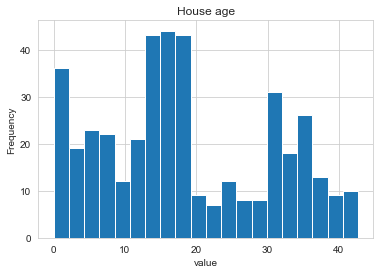

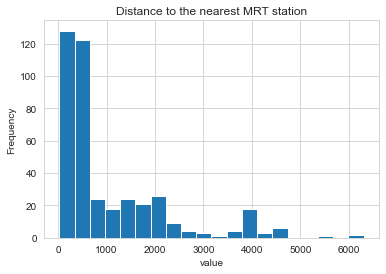

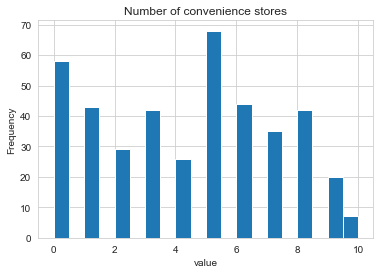

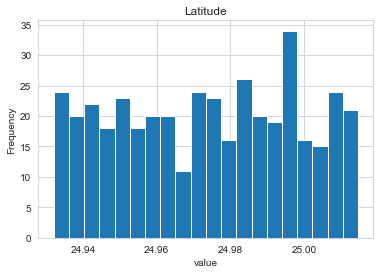

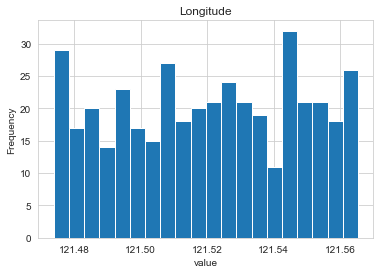

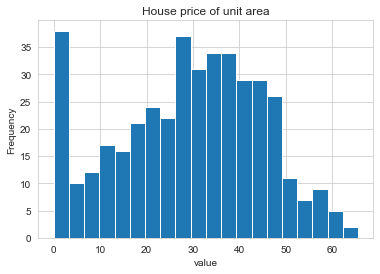

In [6]:
#histogram of all numerical features

#the aesthetic style of the plot
sns.set_style("whitegrid")

#histogram for the numerical columns
numerical_cols = data.select_dtypes(include=[np.number])

for col in numerical_cols.columns:
    plt.hist(data[col], bins=20)
    plt.title(col)
    plt.xlabel("value")
    plt.ylabel("Frequency")
    plt.show()

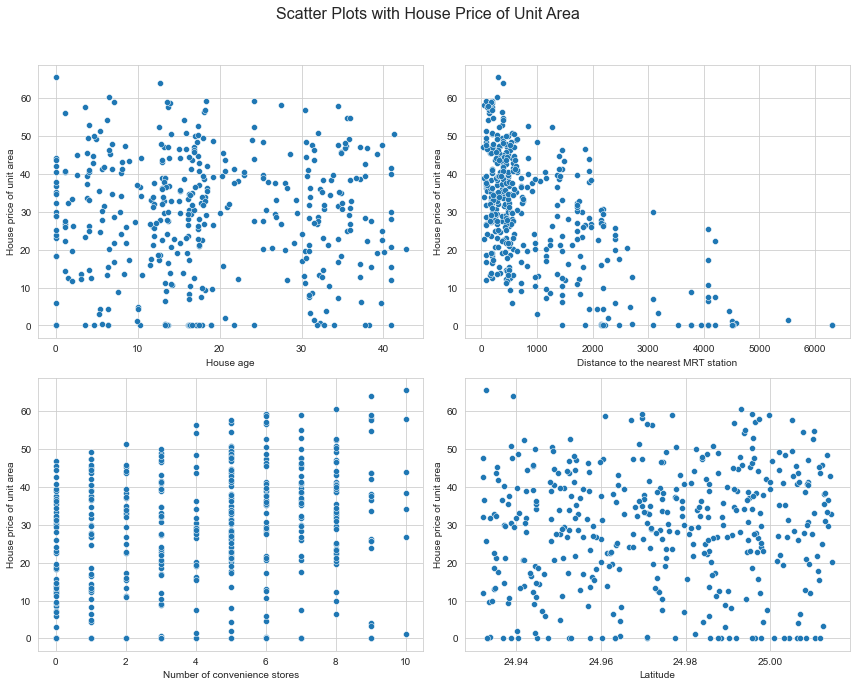

In [7]:
# Scatter plots to observe the relationship with house price

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

#scatter plot for each variable against the house price
sns.scatterplot(data=data, x="House age", y="House price of unit area", ax=axes[0, 0])
sns.scatterplot(data=data, x="Distance to the nearest MRT station", y="House price of unit area", ax=axes[0, 1])
sns.scatterplot(data=data, x="Number of convenience stores", y="House price of unit area", ax=axes[1, 0])
sns.scatterplot(data=data, x="Latitude", y="House price of unit area", ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1,0.95 ])
plt.show()






 1. House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices./n
 
 2. Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.
     
 3. Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
    
 4. Latitude vs. House Price: While not a strong linear relationship, there seems to be a pattern where certain latitudes correspond to higher or lower house prices. It could be indicative of specific neighbourhoods being more desirable. 



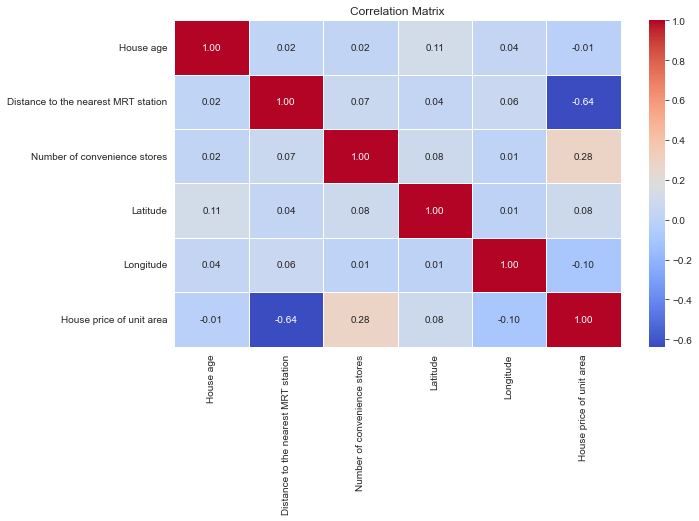

In [8]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


1. House Age: This shows a very weak negative correlation with house price (-0.01), implying that age is not a strong predictor of price in this dataset.
 
2. Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.64). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.

3. Number of Convenience Stores: Displays a moderate positive correlation with house price (0.28). More convenience stores in the vicinity seem to positively affect property prices.

4. Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.08), while longitude has a slight negative correlation (-0.10).

Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby. The geographical location (latitude and longitude) and the age of the house seem to have less impact on the price.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
#selecting features and target

features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = ["House price of unit area"]

X =  data[features]
y= data[target]

#splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#model initalization
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

LinearRegression()

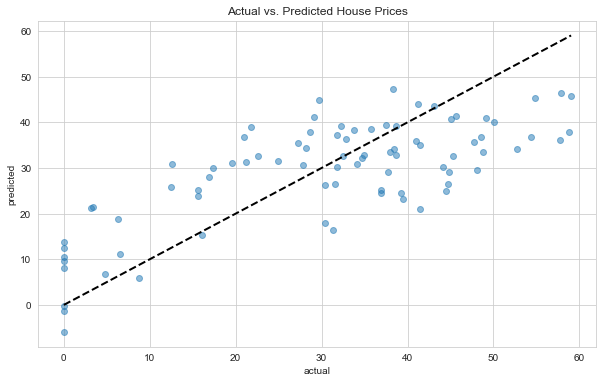

In [11]:
#Visualizing the actual versus predicted to access how well our model is peforming

#making prediction using the linear regression model
y_pred = model.predict(X_test)
e
#visualizing: actual vs predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max() ], "k--", lw=2)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title('Actual vs. Predicted House Prices')
plt.show()

The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

### from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

The model's predictions are reasonably close to the actual house prices, with MAE and RMSE values indicating relatively low prediction errors.

However, there's still room for improvement, as indicated by the non-negligible prediction errors and the moderate R-squared value.

Further refinement of the model or consideration of additional features may help improve predictive performance.